In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 1.97G/1.98G [00:18<00:00, 107MB/s]
100% 1.98G/1.98G [00:18<00:00, 112MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,load_img,img_to_array
warnings.filterwarnings("ignore")


In [17]:
conv_base = MobileNet(
    include_top=False,
    weights="imagenet",
    input_shape = (224,224,3)
)

17225924/17225924 [==============================] - 0s 0us/step


In [18]:
for i in conv_base.layers: # checking with name of layers
  print(i.name,i.trainable)

input_2 True
conv1 True
conv1_bn True
conv1_relu True
conv_dw_1 True
conv_dw_1_bn True
conv_dw_1_relu True
conv_pw_1 True
conv_pw_1_bn True
conv_pw_1_relu True
conv_pad_2 True
conv_dw_2 True
conv_dw_2_bn True
conv_dw_2_relu True
conv_pw_2 True
conv_pw_2_bn True
conv_pw_2_relu True
conv_dw_3 True
conv_dw_3_bn True
conv_dw_3_relu True
conv_pw_3 True
conv_pw_3_bn True
conv_pw_3_relu True
conv_pad_4 True
conv_dw_4 True
conv_dw_4_bn True
conv_dw_4_relu True
conv_pw_4 True
conv_pw_4_bn True
conv_pw_4_relu True
conv_dw_5 True
conv_dw_5_bn True
conv_dw_5_relu True
conv_pw_5 True
conv_pw_5_bn True
conv_pw_5_relu True
conv_pad_6 True
conv_dw_6 True
conv_dw_6_bn True
conv_dw_6_relu True
conv_pw_6 True
conv_pw_6_bn True
conv_pw_6_relu True
conv_dw_7 True
conv_dw_7_bn True
conv_dw_7_relu True
conv_pw_7 True
conv_pw_7_bn True
conv_pw_7_relu True
conv_dw_8 True
conv_dw_8_bn True
conv_dw_8_relu True
conv_pw_8 True
conv_pw_8_bn True
conv_pw_8_relu True
conv_dw_9 True
conv_dw_9_bn True
conv_dw_9_relu Tr

In [40]:
conv_base.trainable = True

set_trainable = False

# conv5_block1_1_conv on this layer over model will train with our data
for layer in conv_base.layers:
  if layer.name == "conv_dw_9":
    set_trainable = True

  if set_trainable:
    layer.trainable = True

  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

# # now wil will fine tune the model

input_2 False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 False
conv_dw_2 False
conv_dw_2_bn False
conv_dw_2_relu False
conv_pw_2 False
conv_pw_2_bn False
conv_pw_2_relu False
conv_dw_3 False
conv_dw_3_bn False
conv_dw_3_relu False
conv_pw_3 False
conv_pw_3_bn False
conv_pw_3_relu False
conv_pad_4 False
conv_dw_4 False
conv_dw_4_bn False
conv_dw_4_relu False
conv_pw_4 False
conv_pw_4_bn False
conv_pw_4_relu False
conv_dw_5 False
conv_dw_5_bn False
conv_dw_5_relu False
conv_pw_5 False
conv_pw_5_bn False
conv_pw_5_relu False
conv_pad_6 False
conv_dw_6 False
conv_dw_6_bn False
conv_dw_6_relu False
conv_pw_6 False
conv_pw_6_bn False
conv_pw_6_relu False
conv_dw_7 False
conv_dw_7_bn False
conv_dw_7_relu False
conv_pw_7 False
conv_pw_7_bn False
conv_pw_7_relu False
conv_dw_8 False
conv_dw_8_bn False
conv_dw_8_relu False
conv_pw_8 False
conv_pw_8_bn False
conv_pw_8_relu F

In [41]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [42]:
model = Sequential() # add resnet50  with this tranable paramater

model.add(conv_base) # added resnet50

model.add(Flatten()) #convert in to array

model.add(Dense(350,activation="elu",kernel_initializer="he_normal"))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(250,activation="elu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(150,activation="elu",kernel_initializer="he_normal"))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(110,activation="elu",kernel_initializer="he_normal"))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(36,activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_21 (Dense)            (None, 350)               17561950  
                                                                 
 dropout_12 (Dropout)        (None, 350)               0         
                                                                 
 batch_normalization_16 (Ba  (None, 350)               1400      
 tchNormalization)                                               
                                                                 
 dense_22 (Dense)            (None, 250)              

In [27]:
# Now Do The Data Augamentation

batch_size = 25

train_gen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1.0/255)

train_data = train_gen.flow_from_directory(
    "/content/train",
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'sparse'
)

validation_data = train_gen.flow_from_directory(
    "/content/validation",
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'sparse'
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [43]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [44]:
# compile the model
model.compile(
    loss = tensorflow.keras.losses.sparse_categorical_crossentropy,
    optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

In [45]:
from keras.src import callbacks
history = model.fit_generator(
    train_data,
    epochs = 10,
    validation_data = validation_data,
    callbacks=[early_stopping]
)

Epoch 1/10
125/125 [==============================] - 152s 1s/step - loss: 1.3882 - accuracy: 0.6270 - val_loss: 1.8413 - val_accuracy: 0.6439
Epoch 2/10
125/125 [==============================] - 139s 1s/step - loss: 0.7401 - accuracy: 0.7917 - val_loss: 0.5457 - val_accuracy: 0.8405
Epoch 3/10
125/125 [==============================] - 140s 1s/step - loss: 0.5861 - accuracy: 0.8209 - val_loss: 0.4985 - val_accuracy: 0.8718
Epoch 4/10
125/125 [==============================] - 139s 1s/step - loss: 0.4832 - accuracy: 0.8514 - val_loss: 0.7519 - val_accuracy: 0.8120
Epoch 5/10
125/125 [==============================] - 143s 1s/step - loss: 0.4472 - accuracy: 0.8677 - val_loss: 0.8459 - val_accuracy: 0.8034
Epoch 6/10
125/125 [==============================] - 139s 1s/step - loss: 0.4110 - accuracy: 0.8787 - val_loss: 0.4716 - val_accuracy: 0.8746
Epoch 7/10
125/125 [==============================] - 141s 1s/step - loss: 0.3649 - accuracy: 0.8851 - val_loss: 0.2807 - val_accuracy: 0.9174

In [46]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.388215,0.626966,1.841270,0.643875
1,0.740059,0.791653,0.545663,0.840456
2,0.586113,0.820867,0.498489,0.871795
3,0.483156,0.851364,0.751864,0.811966
4,0.447238,0.867737,0.845945,0.803419
5,0.410981,0.878652,0.471620,0.874644
6,0.364905,0.885072,0.280695,0.917379
7,0.300889,0.907544,0.382957,0.888889
8,0.301419,0.908186,0.336935,0.914530
9,0.269200,0.920064,0.348501,0.917379


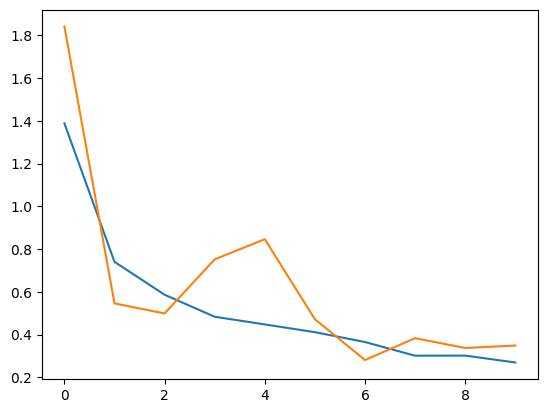

In [47]:
#  plot and see the accuracy and loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

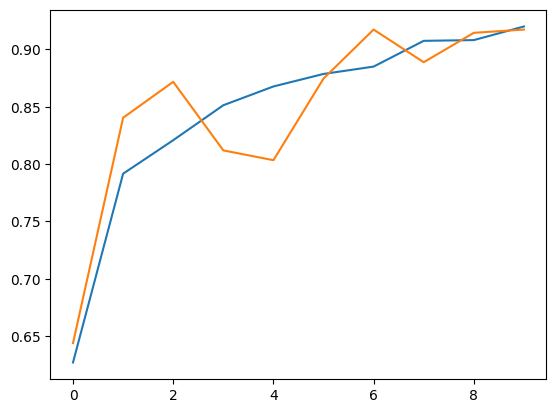

In [48]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

<Axes: >

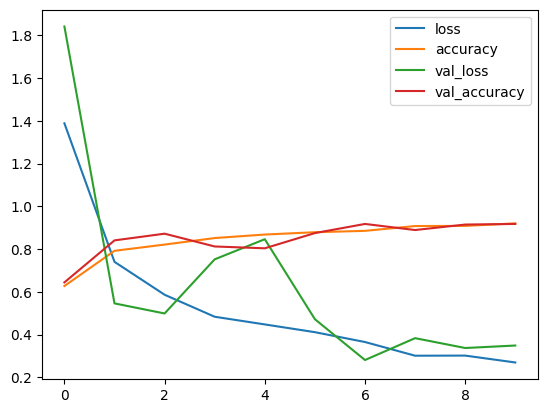

In [49]:
pd.DataFrame(history.history).plot()